# YouTube Spam Collection v. 1

## Grupo 2
Alberto Atilio Sbrana Junior
<br>
Luiz Barreto Pedro de Alcântara
<br>
Priscila Portela Costa

# Problema

Trata-se de um problema de classificação binária sobre comentários de vídeos no Youtube.
<br>
Há no total 5 arquivos, separados por artista:
- Psy
- Katy Perry
- LMFAO
- Eminem
- Shakira

# Bibliotecas

In [76]:
import pandas as pd #manipulação de dataframes
import numpy as np #manipulacao matricial
import seaborn as sns #visualização
import matplotlib.pyplot as plt #visualização

# importa algumas biblioteca para plotar dados em 3D        
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from pylab import *

import scipy.optimize  #otimizacao de parametros

import ML_library #biblioteca criada pelo grupo 2

# Modelo 3: Regressão Logística

## Carregando os _datasets_

In [77]:
#occurency
X_occur_train = pd.read_csv('X_occurrency_train.csv', header=None).values
X_occur_test = pd.read_csv('X_occurrency_test.csv', header=None).values
X_occur_val = pd.read_csv('X_occurrency_validation.csv', header=None).values

Y_occur_train = pd.read_csv('Y_occurrency_train.csv', header=None).values
Y_occur_test = pd.read_csv('Y_occurrency_test.csv', header=None).values
Y_occur_val = pd.read_csv('Y_occurrency_validation.csv', header=None).values

#frequency
X_frequ_train = pd.read_csv('X_frequency_train.csv', header=None).values
X_frequ_test = pd.read_csv('X_frequency_test.csv', header=None).values
X_frequ_val = pd.read_csv('X_frequency_validation.csv', header=None).values

Y_frequ_train = pd.read_csv('Y_frequency_train.csv', header=None).values
Y_frequ_test = pd.read_csv('Y_frequency_test.csv', header=None).values
Y_frequ_val = pd.read_csv('Y_frequency_validation.csv', header=None).values

#tf_idf
X_tfidf_train = pd.read_csv('X_tfidf_train.csv', header=None).values
X_tfidf_test = pd.read_csv('X_tfidf_test.csv', header=None).values
X_tfidf_val = pd.read_csv('X_tfidf_validation.csv', header=None).values

Y_tfidf_train = pd.read_csv('Y_tfidf_train.csv', header=None).values
Y_tfidf_test = pd.read_csv('Y_tfidf_test.csv', header=None).values
Y_tfidf_val = pd.read_csv('Y_tfidf_validation.csv', header=None).values

## Funções auxiliares

In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predicao(theta, X):
    return np.round(sigmoid(X.dot(theta)) + 1e-15)

def funcaoCustoReg(theta, X, Y, l):
    m = len(Y)
    eps = 1e-15
    h = sigmoid(X.dot(theta))
    J = -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h + eps)) + (l / (2 * m)) * np.sum(np.square(theta[1:]))
    reg = l / m * theta[1:]
    grad = (1 / m) * np.dot(X.T, h - Y)
    grad[1:] += reg
    return J, grad

In [79]:
import scipy.optimize  

lambda_reg = 1
MaxIter = 10 #número máximo de iterações para a minimização da função de custo

## Occurency

In [80]:
X_train_occur_rl = np.array(X_occur_train, dtype = float)
Y_train_occur_rl = np.array(Y_occur_train, dtype = float)

X_val_occur_rl = np.array(X_occur_val, dtype = float)
Y_val_occur_rl = np.array(Y_occur_val, dtype = float)

m_train, n_train = X_train_occur_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto
m_val, n_val = X_val_occur_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto

X_train_occur_rl = np.column_stack((np.ones(m_train), X_train_occur_rl)) # Adiciona uma coluna de 1s em x_train
X_val_occur_rl = np.column_stack((np.ones(m_val), X_val_occur_rl)) # Adiciona uma coluna de 1s em x_val

theta = np.zeros(n_train+1) # Inicializa os parâmetros que serão ajustados

In [81]:
# minimiza a funcao de custo
result_occur = scipy.optimize.minimize(fun=funcaoCustoReg, x0=theta, args=(X_train_occur_rl, 
                                                                           Y_train_occur_rl.T[0], lambda_reg),  
                method='BFGS', jac=True, options={'maxiter': MaxIter, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result_occur.x

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


         Current function value: 0.415666
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18


In [82]:
res_occur = predicao(theta, X_val_occur_rl)
cm_rl_occur = ML_library.get_confusionMatrix(Y_val_occur_rl, res_occur, [0,1])
vp=cm_rl_occur[0,0] # quantidade de verdadeiros positivos
vn=cm_rl_occur[1,1] # quantidade de verdadeiros negativos
fp=cm_rl_occur[1,0] # quantidade de falsos positivos
fn=cm_rl_occur[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
print(cm_rl_occur)
f1 = 2 * (precision * recall) / (precision + recall)
print('Score F1: {}'.format(f1))

[[129  20]
 [ 30  88]]
Score F1: 0.8376623376623376


## Frequency

In [83]:
X_train_frequ_rl = np.array(X_frequ_train, dtype = float)
Y_train_frequ_rl = np.array(Y_frequ_train, dtype = float)

X_val_frequ_rl = np.array(X_frequ_val, dtype = float)
Y_val_frequ_rl = np.array(Y_frequ_val, dtype = float)

m_train, n_train = X_train_frequ_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto
m_val, n_val = X_val_frequ_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto

X_train_frequ_rl = np.column_stack((np.ones(m_train), X_train_frequ_rl)) # Adiciona uma coluna de 1s em x_train
X_val_frequ_rl = np.column_stack((np.ones(m_val), X_val_frequ_rl)) # Adiciona uma coluna de 1s em x_val

theta = np.zeros(n_train+1) # Inicializa os parâmetros que serão ajustados

In [84]:
# minimiza a funcao de custo
result_frequ = scipy.optimize.minimize(fun=funcaoCustoReg, x0=theta, args=(X_train_frequ_rl, 
                                                                           Y_train_frequ_rl.T[0], lambda_reg),  
                method='BFGS', jac=True, options={'maxiter': MaxIter, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result_frequ.x

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


         Current function value: 0.411573
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18


In [85]:
res_frequ = predicao(theta, X_val_frequ_rl)
cm_rl_frequ = ML_library.get_confusionMatrix(Y_val_frequ_rl, res_frequ, [0,1])
vp=cm_rl_frequ[0,0] # quantidade de verdadeiros positivos
vn=cm_rl_frequ[1,1] # quantidade de verdadeiros negativos
fp=cm_rl_frequ[1,0] # quantidade de falsos positivos
fn=cm_rl_frequ[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
print(cm_rl_frequ)
f1 = 2 * (precision * recall) / (precision + recall)
print('Score F1: {}'.format(f1))

[[132  17]
 [ 31  87]]
Score F1: 0.8461538461538461


## TF-IDF

In [86]:
X_train_tfidf_rl = np.array(X_tfidf_train, dtype = float)
Y_train_tfidf_rl = np.array(Y_tfidf_train, dtype = float)

X_val_tfidf_rl = np.array(X_tfidf_val, dtype = float)
Y_val_tfidf_rl = np.array(Y_tfidf_val, dtype = float)

m_train, n_train = X_train_tfidf_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto
m_val, n_val = X_val_tfidf_rl.shape # m = qtde de objetos e n = qtde de atributos por objeto

X_train_tfidf_rl = np.column_stack((np.ones(m_train), X_train_tfidf_rl)) # Adiciona uma coluna de 1s em x_train
X_val_tfidf_rl = np.column_stack((np.ones(m_val), X_val_tfidf_rl)) # Adiciona uma coluna de 1s em x_val

theta = np.zeros(n_train+1) # Inicializa os parâmetros que serão ajustados

In [87]:
# minimiza a funcao de custo
result_tfidf = scipy.optimize.minimize(fun=funcaoCustoReg, x0=theta, args=(X_train_tfidf_rl, Y_train_tfidf_rl.T[0], 
                                                                           lambda_reg),  
                method='BFGS', jac=True, options={'maxiter': MaxIter, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result_tfidf.x

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


         Current function value: 0.409754
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18


In [88]:
res_tfidf = predicao(theta, X_val_tfidf_rl)
cm_rl_tfidf = ML_library.get_confusionMatrix(Y_val_tfidf_rl, res_tfidf, [0,1])
vp=cm_rl_tfidf[0,0] # quantidade de verdadeiros positivos
vn=cm_rl_tfidf[1,1] # quantidade de verdadeiros negativos
fp=cm_rl_tfidf[1,0] # quantidade de falsos positivos
fn=cm_rl_tfidf[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
print(cm_rl_tfidf)   
f1 = 2 * (precision * recall) / (precision + recall)
print('Score F1: {}'.format(f1))

[[130  19]
 [ 37  81]]
Score F1: 0.8227848101265823


Verificamos que o modelo que usa o modo de tratamento _Frequency_ é o que obteve o maior valor na métrica escolhida.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


         Current function value: 0.342464
         Iterations: 10
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.362701
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.348317
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.376674
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.381226
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.396204
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.398889
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.418902
         Iterations:

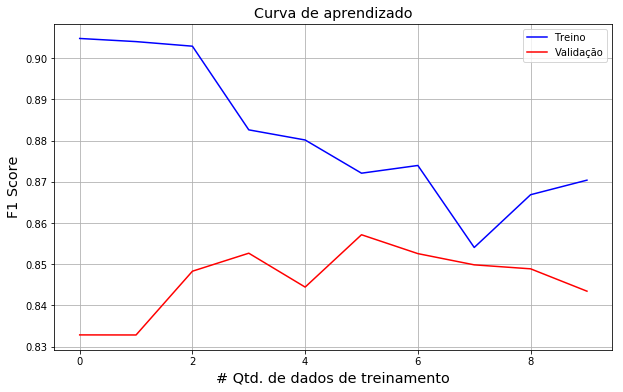

In [89]:
def curva_aprendizado_lr(X, Y, Xval, Yval):

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []
    
    num_rows = len(X)
    
    for i in range(100,num_rows, 100):
        x_train = X[0:i,:]
        y_train = Y[0:i]
        
        m_train, n_train = x_train.shape
        m_val, n_val = Xval.shape
        
        theta = np.zeros(n_train+1) # Inicializa os parâmetros que serão ajustados

        x_train = np.column_stack((np.ones(m_train), x_train)) # Adiciona uma coluna de 1s em x
        Xval_n = np.column_stack((np.ones(m_val), Xval))

        
        result_freq = scipy.optimize.minimize(fun=funcaoCustoReg, 
                                               x0=theta, 
                                               args=(x_train, y_train.T[0], lambda_reg),  
                            method='BFGS', jac=True, options={'maxiter': MaxIter, 'disp':True})

        # coleta os thetas retornados pela função de minimização
        theta = result_freq.x
        
        #train
        pred_train = predicao(theta, x_train)          
        
        #validation
        pred_val = predicao(theta, Xval_n)        
        
        #scores
        #train
        cm_train = ML_library.get_confusionMatrix(y_train, pred_train, [0,1])
        vp_train=cm_train[0,0] # quantidade de verdadeiros positivos
        vn_train=cm_train[1,1] # quantidade de verdadeiros negativos
        fp_train=cm_train[1,0] # quantidade de falsos positivos
        fn_train=cm_train[0,1] # quantidade de falsos negativos
        
        recall_train = vp_train/(vp_train+fn_train)
        precision_train = vp_train/(vp_train+fp_train)
    
        f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)               
        #val     
        cm_val = ML_library.get_confusionMatrix(Yval, pred_val, [0,1])
        vp_val=cm_val[0,0] # quantidade de verdadeiros positivos
        vn_val=cm_val[1,1] # quantidade de verdadeiros negativos
        fp_val=cm_val[1,0] # quantidade de falsos positivos
        fn_val=cm_val[0,1] # quantidade de falsos negativos
        
        recall_val = vp_val/(vp_val+fn_val)
        precision_val = vp_val/(vp_val+fp_val)
    
        f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)         
                
        perf_train.append(f1_train)
        perf_val.append(f1_val)
       
    # Define o tamanho da figura 
    plt.figure(figsize=(10,6))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'F1 Score',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado_lr(X_train_frequ_rl, Y_train_frequ_rl, X_val_frequ_rl, Y_val_frequ_rl)

Verificamos que a curva de aprendizado age de acordo com o esperado, com o crescimento do score no _dataset_ de validação e diminuição do score no dataset de treino.

Se utilizarmos o _dataset_ de teste, obteremos o resultado a seguir:

In [90]:
X_test_frequ_rl = np.array(X_frequ_test, dtype = float)
Y_test_frequ_rl = np.array(Y_frequ_test, dtype = float)

m_test, n_test = X_test_frequ_rl.shape
X_test_frequ_rl = np.column_stack((np.ones(m_test), X_test_frequ_rl)) # Adiciona uma coluna de 1s em x

theta = result_frequ.x

res_frequ = predicao(theta, X_test_frequ_rl)
cm = ML_library.get_confusionMatrix(Y_test_frequ_rl, res_frequ, [0,1])
vp=cm[0,0] # quantidade de verdadeiros positivos
vn=cm[1,1] # quantidade de verdadeiros negativos
fp=cm[1,0] # quantidade de falsos positivos
fn=cm[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
print(cm)  
f1 = 2 * (precision * recall) / (precision + recall)
print('Score F1: {}'.format(f1))

[[166  20]
 [ 25 122]]
Score F1: 0.8806366047745358


Verficamos que os scores obtidos com o _dataset_ de validação e o _dataset_ de teste são parecidos, o que é um indicativo de que não há overfit.